## Fractals

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module

from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180

# np.warnings.filterwarnings("ignore")

%matplotlib inline

### LSystem

In [58]:
### https://colab.research.google.com/github/paulgb/bitaesthetics/blob/master/notebooks/Fractal%20Generation%20with%20L-Systems.ipynb#scrollTo=on_7hKm27nND

# 'F' means move forward one unit and trace the path with a line.
# 'f' means move forward one unit but don't draw anything.
# '-' means rotate counter-clockwise but don't move.
# '+' means rotate clockwise but don't move.
# '[' Remember current state
# ']' Return to previous state

def plot_coords(coords, bare_plot=True):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    plt.margins(x=0.1, y=0.1)
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y)

def turtle_to_coords(turtle_program, turn_amount=45):
    # The state variable tracks the current location and angle of the turtle.
    # The turtle starts at (0, 0) facing up (90 degrees).
    state = (0.0, 0.0, 90.0)
    
    # Throughout the turtle's journey, we "yield" its location. These coordinate
    # pairs become the path that plot_coords draws.
    yield (0.0, 0.0)
    
    # Loop over the program, one character at a time.
    for command in turtle_program:
        x, y, angle = state
        
        if command in 'Ff':      # Move turtle forward
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command == 'f':
                # Insert a break in the path so that
                # this line segment isn't drawn.
                yield (float('nan'), float('nan'))
                
            yield (state[0], state[1])
                        
        elif command == '+':     # Turn turtle clockwise without moving
            state = (x, y, angle + turn_amount)
            
        elif command == '-':     # Turn turtle counter-clockwise without moving
            state = (x, y, angle - turn_amount)

def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

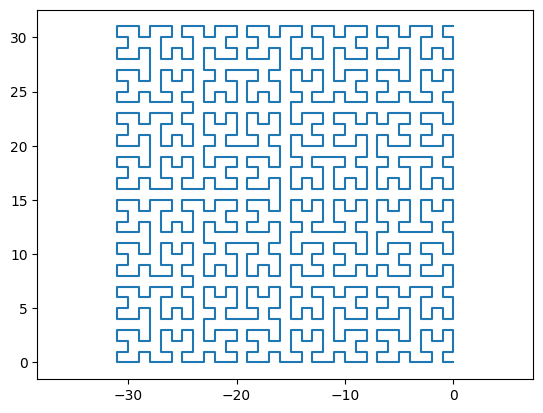

In [27]:
plot_coords(turtle_to_coords(transform_multiple('L', {
    'L': '-RF+LFL+FR-',
    'R': '+LF-RFR-FL+'
}, 5), 90))

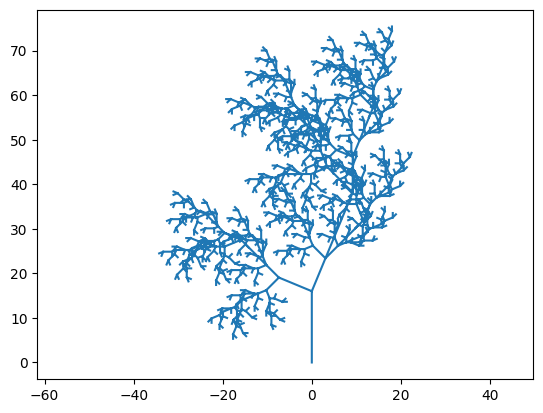

In [56]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

### IFS Fractals

In [52]:
# https://medium.com/@hfahmida/creating-a-barnsley-fern-using-python-67993b55edb
def transform(matrix, offset_x, offset_y):
    def t(vector):
        x, y = vector
        x_new = x * matrix[0][0] + y * matrix[0][1] + offset_x
        y_new = x * matrix[1][0] + y * matrix[1][1] + offset_y
        return x_new, y_new
    return t


def generate_fern(num_points, transformations, probabilities):
    points = [(0, 0)]
    current_point = np.array([0, 0])
    
    for _ in range(num_points):
        random_transformation = np.random.choice(transformations, p=probabilities)
        current_point = random_transformation(current_point)
        points.append(tuple(current_point))
    
    return points

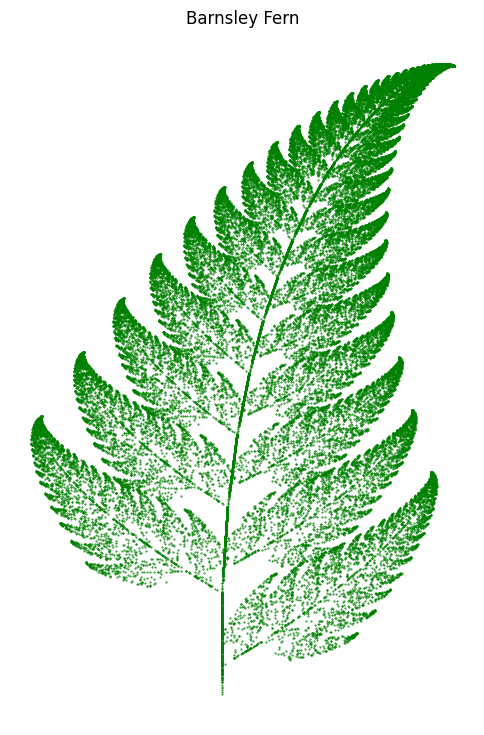

In [53]:
num_points = 50000

transformations = [
    transform([[0.85, 0.04], [-0.04, 0.85]], 0, 1.6),
    transform([[0.20, -0.26], [0.23, 0.22]], 0, 1.6),
    transform([[-0.15, 0.28], [0.26, 0.24]], 0, 0.44),
    transform([[0, 0], [0, 0.16]], 0, 0),
]

probabilities = [0.85, 0.07, 0.07, 0.01]

fern_points = generate_fern(num_points, transformations, probabilities)

x_vals, y_vals = zip(*fern_points)

plt.figure(figsize=(6, 9))
plt.scatter(x_vals, y_vals, s=0.2, c='green')
plt.title("Barnsley Fern")
plt.axis('off')
plt.show()

### Mandelbrot

In [39]:
# https://realpython.com/mandelbrot-set-python/
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= 2

/tmp/ipykernel_11159/3325771733.py:10: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
/tmp/ipykernel_11159/3325771733.py:10: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


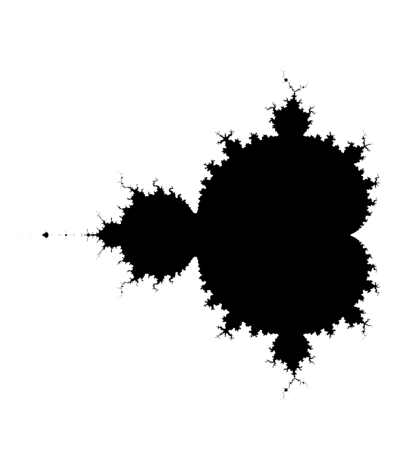

In [40]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

### 3d Mandelbrot valley landscape generation

/tmp/ipykernel_11159/4282788532.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 4.5 # set viewpoint distance
/tmp/ipykernel_11159/4282788532.py:25: RuntimeWarning: overflow encountered in square
  ZZ = Z**2 + C
/tmp/ipykernel_11159/4282788532.py:25: RuntimeWarning: invalid value encountered in square
  ZZ = Z**2 + C
/tmp/ipykernel_11159/4282788532.py:15: RuntimeWarning: overflow encountered in absolute
  return np.e**(-np.abs(Z))


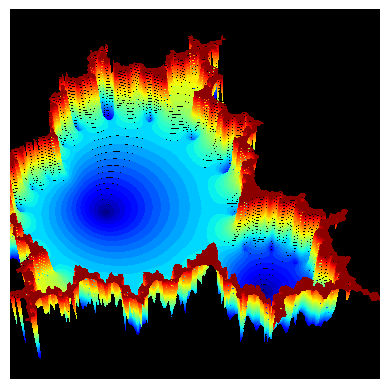

In [41]:
# https://inters.org/files/research/forminfo/04_chapter_04.pdf

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')

ax.view_init(azim=120,elev=60) # set view orientation
ax.dist = 4.5 # set viewpoint distance
ax.set_facecolor([0.0,0.0,0.0]) # set background color
n = 20 # set number of cycles
dx = -0.6 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.3 # set square area side
M = 200 # set side number of pixels
def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))
x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid

Z = np.zeros(M) # complex plane starting points area
W = np.zeros((M,M)) # zero matrix of elevation values
C = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)

ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-L,1.5*L) # set x axis limits
ax.axis("off") # do not plot axes
ax.contourf3D(X, Y, -W, 2*n, cmap="jet") # make contour plot
plt.show() # show plot